FER2013 - CNN

In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
df = pd.read_csv('C:/Kecilin/emotion_detection/V1/fer2013/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [3]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 

In [4]:
img_array = df.pixels.apply(lambda x: np.array(x.split(" ")).reshape(48,48,1).astype('float32'))
img_array = np.stack(img_array, axis=0)
labels = df.emotion.values

In [5]:
img_array.shape

(35887, 48, 48, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size= .2)

In [7]:
y_train[0]

3

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
# # Create data generators for training and validation sets
# train_datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
# )

# validation_datagen = ImageDataGenerator()  # No augmentation for validation data

# # Generate augmented data for training set
# train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

In [10]:
basemodel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [11]:
basemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [12]:
initial_learning_rate = 0.001  # You can adjust this value
optimizer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)
basemodel.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
def lr_schedule(epoch):
    if epoch < 20:
        return initial_learning_rate
    else:
        return initial_learning_rate * 0.1

In [14]:
# # Define early stopping
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_accuracy',
#     patience=10,
#     restore_best_weights=True
# )

In [15]:
file_name = 'new_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)

call_back = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        monitor='val_accuracy',
                                        verbose=1,
                                        save_freq='epoch',
                                        save_best_only=True,
                                        save_weights_only=False,
                                        mode='max'),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=20,
        restore_best_weights=True
    ),
    tf.keras.callbacks.LearningRateScheduler(lr_schedule)
]

In [16]:
history = basemodel.fit(X_train, y_train,
                        epochs=50,
                        batch_size=8,
                        validation_data=(X_test, y_test),
                        callbacks=call_back)

Epoch 1/50
3586/3589 [============================>.] - ETA: 0s - loss: 1.6759 - accuracy: 0.3257
Epoch 1: val_accuracy improved from -inf to 0.42951, saving model to checkpoint\new_model.h5
3589/3589 [==============================] - 62s 17ms/step - loss: 1.6758 - accuracy: 0.3257 - val_loss: 1.4636 - val_accuracy: 0.4295 - lr: 0.0010
Epoch 2/50
   7/3589 [..............................] - ETA: 1:07 - loss: 1.5609 - accuracy: 0.4464

C:\Users\vince\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3588/3589 [============================>.] - ETA: 0s - loss: 1.4751 - accuracy: 0.4246
Epoch 2: val_accuracy improved from 0.42951 to 0.47534, saving model to checkpoint\new_model.h5
3589/3589 [==============================] - 62s 17ms/step - loss: 1.4751 - accuracy: 0.4246 - val_loss: 1.3779 - val_accuracy: 0.4753 - lr: 0.0010
Epoch 3/50
3587/3589 [============================>.] - ETA: 0s - loss: 1.3894 - accuracy: 0.4622
Epoch 3: val_accuracy improved from 0.47534 to 0.49276, saving model to checkpoint\new_model.h5
3589/3589 [==============================] - 62s 17ms/step - loss: 1.3894 - accuracy: 0.4622 - val_loss: 1.3235 - val_accuracy: 0.4928 - lr: 0.0010
Epoch 4/50
3586/3589 [============================>.] - ETA: 0s - loss: 1.3328 - accuracy: 0.4816
Epoch 4: val_accuracy improved from 0.49276 to 0.51031, saving model to checkpoint\new_model.h5
3589/3589 [==============================] - 62s 17ms/step - loss: 1.3327 - accuracy: 0.4818 - val_loss: 1.2947 - val_accuracy: 0.510

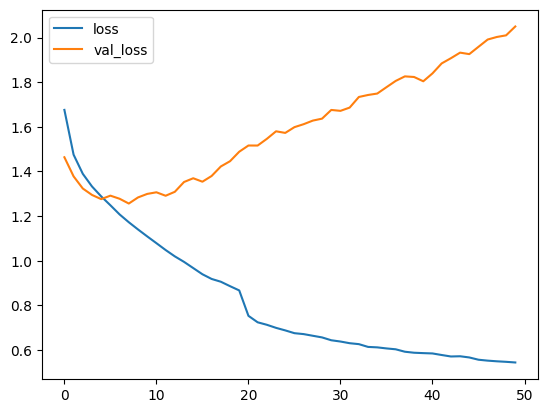

In [17]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

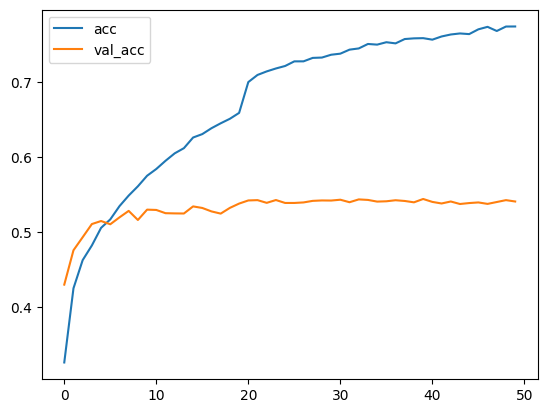

In [18]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

225/225 [==============================] - 2s 9ms/step
Confusion matrix, without normalization
[[ 409    3  125  102  168   33  143]
 [  28   26   13    9   20    1    5]
 [ 126    2  380   88  214   95  127]
 [  90    0   70 1331  120   38  127]
 [ 137    3  190  113  517   24  209]
 [  29    0   96   58   38  594   26]
 [ 115    0  109  138  242   25  622]]


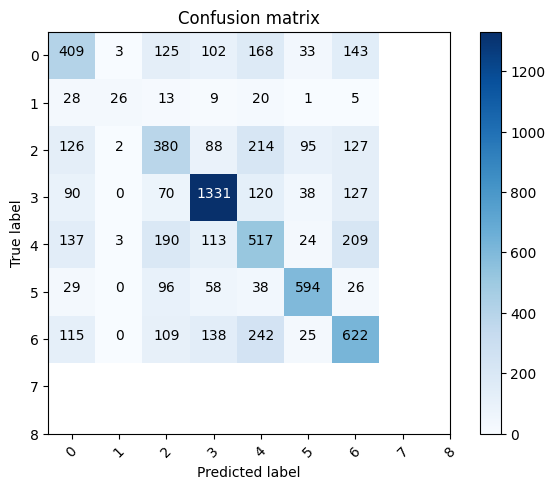

In [19]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = basemodel.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(9)))

In [ ]:
checkpoint_path

In [ ]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time

for k in range(40):
        print(f'actual label is {label_to_text[y_test[k]]}')
        predicted_class = final_model.predict(tf.expand_dims(X_test[k],0)).argmax()
        print(f'predicted label is {label_to_text[predicted_class]}')
        pyplot.imshow(X_test[k].reshape((48,48)))
        pyplot.show()
        time.sleep(3)
        clear_output(wait=True)